为便于根据岭参数的范围获得对应的岭迹曲线（每个回归系数对应一条曲线），现用Python编写函数plot_ridge_curve实现岭迹曲线的绘制功能

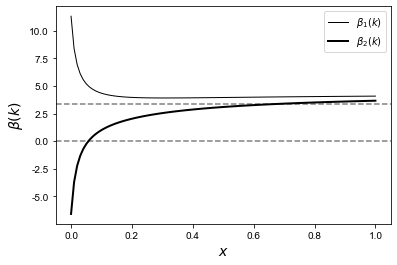

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial Unicode MS'

def plot_ridge_curve(X,y,plist,kmax=1,qnum=10,intercept=True):
    """
    绘制岭迹曲线
    X : 自变量的数据矩阵
    y : 响应变量向量或矩阵
    plist : 选择显示的系数列表
    kmax : 岭参数的最大值
    qnum : 将0~kmax的区间分成qnum等分
    intercept : 是否计算戴距
    """
    if intercept:
        X = np.c_[X,[1]*X.shape[0]]
    
    coefs = []
    for k in np.linspace(0,kmax,qnum+1):
        coefs.append(np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)+k*np.identity(X.shape[1])),X.T),y))
    
    coefs = np.array(coefs)
    plt.axhline(0,0,kmax,linestyle='--',c='gray')
    plt.axhline(np.mean(coefs[:,plist]),0,kmax,linestyle='--',c='gray')
    
    for p in plist:
        plt.plot(np.linspace(0,kmax,qnum+1),coefs[:,p],'-',label=r"$\beta_"+str(p+1)+"(k)$",color='black',linewidth=p+1)
    plt.xlabel(r"$x$",fontsize=14)
    plt.ylabel(r"$\beta(k)$",fontsize=14)
    plt.legend()
    plt.show()
    
import pandas as pd
out = pd.read_csv("http://image.cador.cn/data/demo.614.csv")
X = out.drop(columns='y').values
y = out.y.values
plot_ridge_curve(X,y,[0,1],kmax=1,qnum=100)